# MILESTONE 1

**NAME : IQBAL JANITRA**

**BATCH : 003**


## PROBLEM STATEMENT

our company wants to release game products in the future, and we want to focus on what kind of games to choose, but we want to determine what types of games are in great demand by many people in the future, and we have a data set of all game purchases that we get from https://www.kaggle.com/datasets/gregorut/videogamesales.
First, we input the data we get

1. our company need to decide what console with better platform have most sales on  2013-2016
2. What kind of game genre most sales on 2013-2016



### SMART

**Specific** : Create report data for companies that plan to make new types of games, and consoles to be used.

**Measurable** : Feasibility testing can also be done by looking at the increase in Global sales that occurred from 2013 to 2016. If we find a suitable genre and console, then we will make that type of genre on the right platform.

**Attainable** : The results of the data we get for the results of this analysis are used for feasibility values. This can be done because this data processing can affect market sales that are most in demand in game things

**Relevant** : the data that we are analyzing at this time is really needed for the progress of our company which will launch games in the future, the results of the analysis are used to determine what game to make and what console to use to run the game.

**Time bound** : at the beginning of 2017 and into the following year, because we use annual analysis data from 2013 to 2016.

In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### DATA LOADING

next we import CSV file from kaggle

In [86]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/MILESTONE/vgsales.csv")

#### Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [87]:
df.shape

(16598, 11)

### DATA CLEANING

We can see that the amount of data we got is 16598 rows and 11 columns. Next, let's clean up the data. I think there maybe unknown data and unused data should we remove. 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [89]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


we can see, we got the data, but we have unused colomns and years to remove, because we only used data from 2013 - 2016.

In [90]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

After ensuring our dataframe has been loaded successfully, we want to see the whole info about our dataframe, the information and find out how many data's are in this dataframe. So we declare our dataframe followed.

counting every unique number on every coloumns using nunique()

In [91]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Sorting tabel by year

In [92]:
df.sort_values(by='Year', inplace=True, ascending=False) 
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [93]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.0,0.14,0.00,0.17


now we need to detect unknown data and if we get more than 50% unknown data we are going to fill it and if we get less than 50% we just remove it.

In [94]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

we can see we only got just less unknown data, and were going to remove it.

In [95]:
df.dropna(subset = ['Year','Publisher','Name'], axis = 0,inplace=True)

showing tabel after removing unknown data

In [96]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

now the data ha been cleared from unknown data. next we are going to remove table that we wont to use first we remove game's name, rank, publisher because we dont need it, we just analyze data from genre and platform. and then were going to remove JP, NA, EU sales because our data on based on global sales

In [97]:
df.drop(['Name','Rank','Publisher','JP_Sales','NA_Sales','EU_Sales','Other_Sales'], axis=1, inplace=True)


In [98]:
df.Year = df.Year.astype(int)
df.head(10)

,Platform,Year,Genre,Global_Sales
5957,DS,2020,Simulation,0.29
14390,PS4,2017,Role-Playing,0.03
16241,PSV,2017,Role-Playing,0.01
16438,PSV,2017,Action,0.01
8293,3DS,2016,Role-Playing,0.17
13647,PS4,2016,Action,0.04
13596,3DS,2016,Misc,0.04
13602,PSV,2016,Action,0.04
13614,PS4,2016,Misc,0.04
13620,PS3,2016,Action,0.04


droping the year which is under 2013, because we don't need a year that is too old

In [99]:
df.drop(df[(df['Year'] < 2013)].index, inplace=True)


In [100]:
df.drop(df[(df['Year'] > 2016)].index, inplace=True)

checking any duplicate data, and here is our data just clear from duplicate data

In [101]:
df.duplicated().any()

True

checking shape of table after we cleaned the data

In [102]:
df.shape

(2082, 4)

In [103]:
df

,Platform,Year,Genre,Global_Sales
8293,3DS,2016,Role-Playing,0.17
13647,PS4,2016,Action,0.04
13596,3DS,2016,Misc,0.04
13602,PSV,2016,Action,0.04
13614,PS4,2016,Misc,0.04
...,...,...,...,...
15406,WiiU,2013,Fighting,0.02
10741,X360,2013,Simulation,0.10
11423,X360,2013,Action,0.08
8637,PSV,2013,Adventure,0.16


And here is it, we got cleaned our data, what we need for our company to research what kind of game we need in the next year 2017, next we are going to data exploration.

and here it is, my data has been cleared

# DATA EXPLORATION

In this section of our analysis, we want to specify on how many genre, platform and global sale on the data we got

In [104]:
df['Genre'].value_counts().to_frame()

,Genre
Action,707
Role-Playing,279
Adventure,222
Sports,208
Shooter,172
Misc,140
Racing,82
Fighting,78
Platform,71
Strategy,54


counting every console platform based on our data

In [105]:
df['Platform'].value_counts().to_frame()

,Platform
PS3,341
PSV,336
PS4,335
3DS,290
XOne,213
X360,187
PC,170
WiiU,111
PSP,67
Wii,22


max sales on global sales

In [106]:
df['Global_Sales'].max()

21.4

min sales on global sales   

In [107]:
df['Global_Sales'].min()

0.01

find out unique value on genre

In [108]:
df.Genre.unique()

array(['Role-Playing', 'Action', 'Misc', 'Adventure', 'Strategy',
       'Fighting', 'Sports', 'Simulation', 'Racing', 'Shooter',
       'Platform', 'Puzzle'], dtype=object)

find out unique value on platform

In [109]:
df.Platform.unique()

array(['3DS', 'PS4', 'PSV', 'PS3', 'XOne', 'PC', 'WiiU', 'X360', 'PSP',
       'Wii', 'DS'], dtype=object)

checking global sales on every console

In [110]:
df.groupby(by = 'Platform', sort = True)['Global_Sales'].mean()

Platform
3DS     0.457241
DS      0.198000
PC      0.217000
PS3     0.554721
PS4     0.830060
PSP     0.052985
PSV     0.112798
Wii     0.697727
WiiU    0.576757
X360    0.748128
XOne    0.662254
Name: Global_Sales, dtype: float64

### CENTRAL TENDENCY

After we clean up the data and we can see the highest sales on platform console and genre platform we decide to use PS4 as our brand new game soon which Action genre, action genre has most popular game every year, now before we do data visualization we need to research the data more about PS4 And Action games based on global sales every year.

separates each game genre, and all we want is an Action to make it as a variable

In [111]:
Action = df.loc[df['Genre']=='Action']
Action

,Platform,Year,Genre,Global_Sales
13647,PS4,2016,Action,0.04
13602,PSV,2016,Action,0.04
13620,PS3,2016,Action,0.04
4658,3DS,2016,Action,0.42
13650,XOne,2016,Action,0.04
...,...,...,...,...
4164,PS3,2013,Action,0.47
15700,3DS,2013,Action,0.02
8845,3DS,2013,Action,0.15
846,PS3,2013,Action,2.00


ploting Genre Action by year

<AxesSubplot: xlabel='Year'>

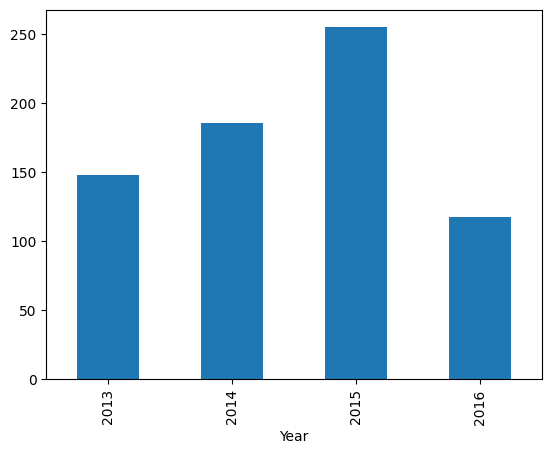

In [112]:
Action.groupby('Year')['Genre'].count().plot(kind='bar')

counting total data of Genre Action

In [113]:
Action_unique=Action.value_counts().sum()

In [114]:
Action_unique

707

separates each Platform, and all we want is a PS4 from platform tablem to make it a variable

In [115]:
PS4 = df.loc[df['Platform']=='PS4']
PS4

,Platform,Year,Genre,Global_Sales
13647,PS4,2016,Action,0.04
13614,PS4,2016,Misc,0.04
13702,PS4,2016,Strategy,0.04
13508,PS4,2016,Racing,0.04
13487,PS4,2016,Misc,0.04
...,...,...,...,...
2529,PS4,2013,Sports,0.82
593,PS4,2013,Shooter,2.58
493,PS4,2013,Sports,2.90
8710,PS4,2013,Platform,0.16


counting total PS4 from platform

In [116]:
PS4_unique=PS4.value_counts().sum()
PS4_unique

335

percentage of PS4 in Genre Action

In [117]:
PS4_Action = PS4_unique/Action_unique*100
print(PS4_Action,'%')

47.38330975954738 %


**Action Genre Plot**

Next were going to make a plot for action game sales, we used plot axvline to see how much sales on action game, we can see action game sale keep growing up and for 2016 the action game still keep going on maybe in the last month on 2016 it should be more than 2017

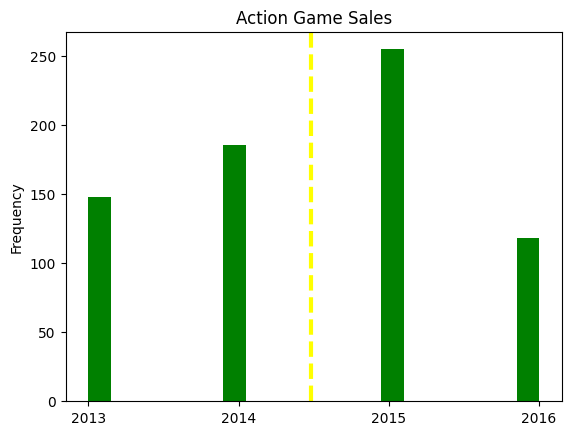

In [118]:
Action.Year.plot.hist(title='Action Game Sales', color='green', bins=20,xticks=[2013,2014,2015,2016])
plt.axvline(Action['Year'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.show()

checking the outliers using boxplot

<AxesSubplot: ylabel='Year'>

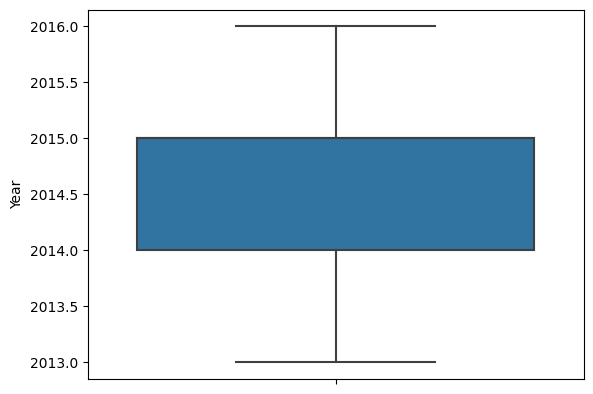

In [119]:
sns.boxplot(data=Action, y = 'Year')

**PS4 Platform Console Plot**

Next were going to make a plot for platform console sales, we used plot axvline to see how much sales platform console, we can platform console sale still keep growing up and for 2016 the console game still keep going on maybe in the last month on 2015 it should be more than 2016

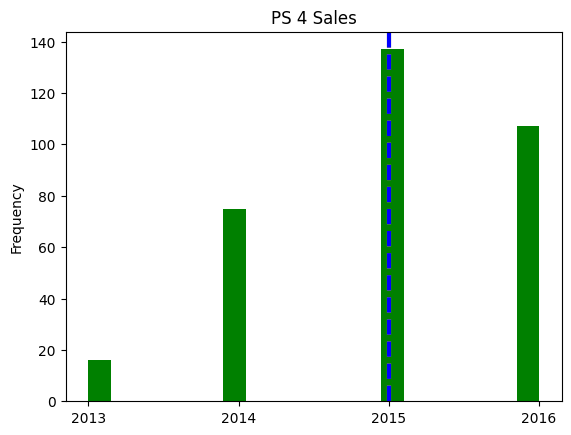

In [120]:
PS4.Year.plot.hist(title='PS 4 Sales', color='green', bins=20,xticks=[2013,2014,2015,2016])
plt.axvline(PS4['Year'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(PS4['Year'].median(), color='blue', linestyle='dashed', linewidth=3)
plt.show()

checking the outliers using boxplot

<AxesSubplot: ylabel='Year'>

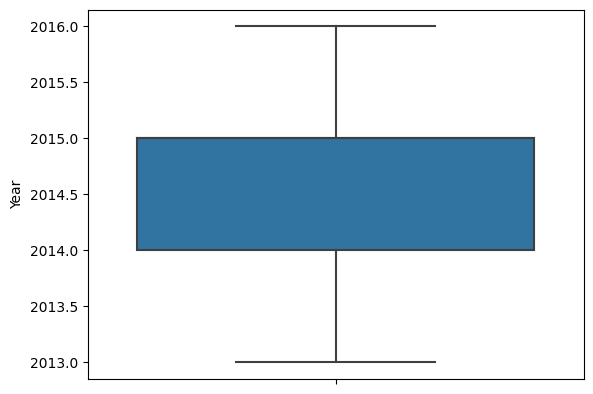

In [121]:
sns.boxplot(data=Action, y = 'Year')

# DATA VISUALISATION

#### PLATFORM
next we will look at the platform visualization data, to see for comparison between PS4, PS3 and Action, RP(role play)

In [122]:
df.groupby(by = 'Year', sort = True)['Platform'].value_counts().to_frame()


Platform
Year Platform          
2013 PS3            127
     3DS             91
     X360            75
     PSV             63
     PSP             54
     WiiU            42
     PC              38
     XOne            19
     PS4             16
     Wii             12
     DS               9
2014 PS3            108
     PSV            102
     3DS             78
     PS4             75
     X360            64
     XOne            61
     PC              44
     WiiU            31
     PSP             10
     Wii              6
     DS               1
2015 PS4            137
     PSV            113
     3DS             86
     XOne            79
     PS3             74
     PC              50
     X360            40
     WiiU            28
     Wii              4
     PSP              3
2016 PS4            107
     PSV             58
     XOne            54
     PC              38
     3DS             35
     PS3             32
     WiiU            10
     X360             8

as we can see, we interested with PS4, because it PS4 have the highest sale on every 2 years, and it founded on 2014 from 2014-2016 we can see the value of PS 4 still going on, maybe on 2017 still keep going on until the new series of PS4 have been launch soon. and yes we got insteresred with the platfrom of PS4, we going to use data visualization on PS4, but wee need sample to comparison with PS3 the previous version of PS4.


making variable platform sale by year

In [123]:
df_platform_peryear = df.groupby(['Year','Platform']).sum().reset_index()

/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_4430/3058461356.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_platform_peryear = df.groupby(['Year','Platform']).sum().reset_index()


making variable for comparison between PS4 and PS3 for next step were going to compare it by annual sales.

In [124]:
df_ps3 = df_platform_peryear[df_platform_peryear['Platform']=='PS3']

In [125]:
df_ps4 = df_platform_peryear[df_platform_peryear['Platform']=='PS4']

now we compare PS4 and PS3 by using plot, we can see the in the plot, PS 4 have the most sales on every console, and for PS3 the console the sales have beed decreased because PS4 is brand new product

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

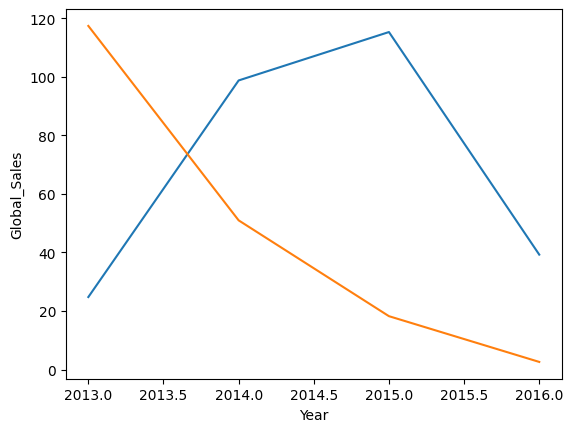

In [126]:
sns.lineplot(x=df_ps4['Year'],y=df_ps4['Global_Sales'])
sns.lineplot(x=df_ps3['Year'],y=df_ps3['Global_Sales'])

As we can see were PS4 still the best console in 2016 and were going to use it as console platform for our game. lets chect on PS3 the sales are going down because PS4 has beed launched many peoples more interested with PS4 than PS3. And we can see PSV is not much sales.

### GENRE GAMES

In [127]:
df2 = df.groupby(by = 'Year', sort = True)['Genre'].value_counts().to_frame()
df2

Genre
Year Genre              
2013 Action          148
     Role-Playing     71
     Adventure        60
     Shooter          59
     Sports           53
     Misc             42
     Platform         37
     Fighting         20
     Strategy         19
     Simulation       18
     Racing           16
     Puzzle            3
2014 Action          186
     Role-Playing     90
     Adventure        75
     Sports           55
     Shooter          47
     Misc             41
     Racing           27
     Fighting         23
     Simulation       11
     Platform         10
     Strategy          8
     Puzzle            7
2015 Action          255
     Role-Playing     78
     Sports           62
     Adventure        54
     Misc             39
     Shooter          34
     Fighting         21
     Racing           19
     Strategy         17
     Simulation       15
     Platform         14
     Puzzle            6
2016 Action          118
     Role-Playing     40
     Sports           38
     Adventure        33
     Shooter          32
     Racing           20
     Misc             18
     Fighting         14
     Platform         10
     Strategy         10
     Simulation        9

And just the same like console but this one, Action game still keep on number 1 in 4 years in a row. but still we need comparison between Action and RP to see the devolopment the game in the future

making variable for comparison between Action and Role-Playing for next step were going to compare it by annual sales.

In [128]:
Action = df.loc[(df['Genre']=='Action')&(df['Platform']=='PS4')].groupby(['Year']).Global_Sales.sum().reset_index()
Action

,Year,Global_Sales
0,2013,4.30
1,2014,42.84
2,2015,31.76
3,2016,8.16


In [129]:
RP = df.loc[(df['Genre']=='Role-Playing')&(df['Platform']=='PS4')].groupby(['Year']).Global_Sales.sum().reset_index()
RP

,Year,Global_Sales
0,2014,5.30
1,2015,16.86
2,2016,3.58


<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

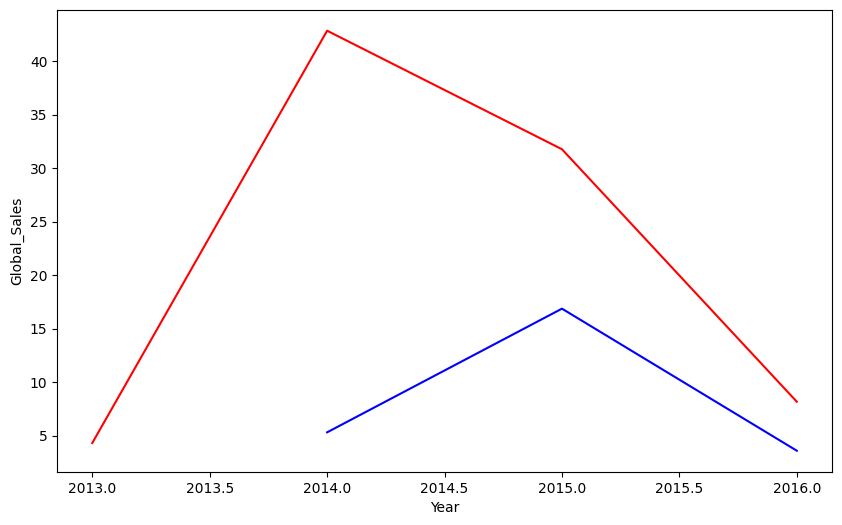

In [130]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=Action['Year'],y=Action['Global_Sales'],legend=True, color='red')
sns.lineplot(x=RP['Year'],y=RP['Global_Sales'],legend=True, color='blue')


We can see the plot showing us Action game have more sales than RP game, action game keep on number 1 on list of genre for the last four year. based on our data RP game maybe have beed founded at 2014 and look the same RP game keep growing up, but still we choose the highest sale on game genre which is Action game.

#### PS4 mean, median, modus

In [142]:
PS4_mean = df_ps4['Global_Sales'].mean()
PS4_mean

69.5175

In [143]:
PS4_median = df_ps4['Global_Sales'].median()
PS4_median

69.005

In [144]:
PS4_modus = df_ps4['Global_Sales'].mode()
PS4_modus

0     24.76
1     39.25
2     98.76
3    115.30
Name: Global_Sales, dtype: float64

In [134]:
#standard deviation of PS4
PS4_std = df_ps4['Global_Sales'].std()
PS4_std

44.23617100292474

#### Action game mean, median, modus

In [135]:
Action_mean = Action['Global_Sales'].mean()
Action_mean

21.765

In [136]:
Action_median = Action['Global_Sales'].median()
Action_median

19.96

In [137]:
Action_modus = Action['Global_Sales'].mode()
Action_modus

0     4.30
1     8.16
2    31.76
3    42.84
Name: Global_Sales, dtype: float64

In [138]:
#standard deviation of Action
Action_std = Action['Global_Sales'].std()
Action_std

18.566797426230153

# HYPHOTHESIS TESTING

In [139]:
# t-test 2 sample 2 tailed for console
tstatcon, pvalcon = stats.ttest_ind(df_ps4['Global_Sales'], df_ps3['Global_Sales'])
tstatgenre, pvalcongenre = stats.ttest_ind(Action['Global_Sales'], RP['Global_Sales'])


# ttest_ind is 2-tailed, we dont need to divide by 2
print('Console: ')
print('Pvalue:',pvalcon)
print('Tstat:',tstatcon)
print('')
print('Genre: ')
print('Pvalue:',pvalcongenre)
print('Tstat:',tstatgenre)

Console: 
Pvalue: 0.5341992170495853
Tstat: 0.6592585111234983

Genre: 
Pvalue: 0.3044040467761753
Tstat: 1.1440400616465087


### PLATFORM CONSOLE

OUR HYPOTHESIS TESTING (2 SAMPLE 2 TAILED): 

**Platform**

H0 : &mu; PS4 = &mu; PS3

H1 : &mu; PS4  != &mu; PS3



**Genre**

H0 : &mu; Action = &mu; RP

H1 : &mu; Action  != &mu; RP

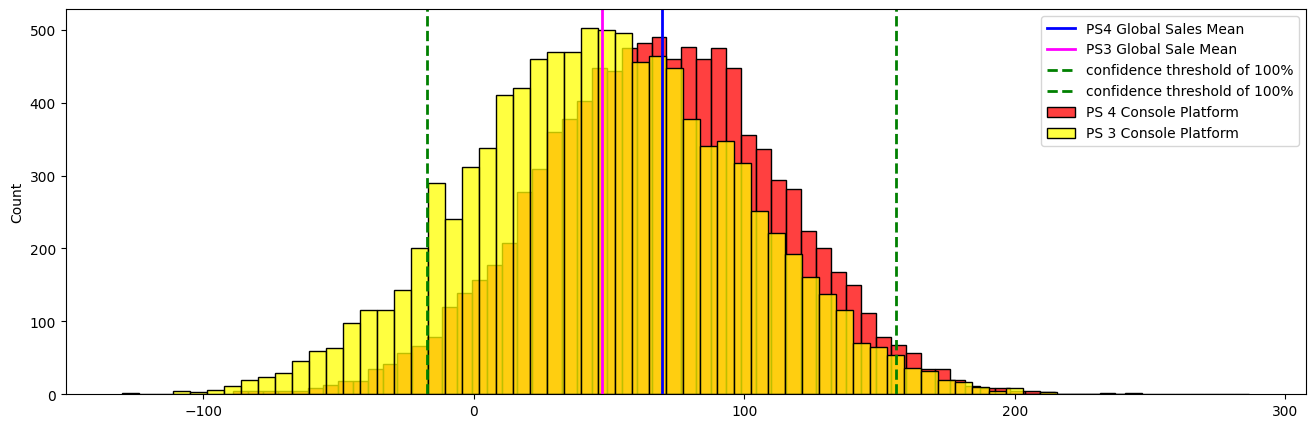

In [145]:
# simulation
PS4fig = np.random.normal(df_ps4['Global_Sales'].mean(),df_ps4['Global_Sales'].std(),10000)
PS3fig = np.random.normal(df_ps3['Global_Sales'].mean(),df_ps3['Global_Sales'].std(),10000)

# confidence interval based on PS4
ci = stats.norm.interval(0.95, df_ps4['Global_Sales'].mean(), df_ps4['Global_Sales'].std())

plt.figure(figsize=(16,5))
sns.histplot(PS4fig, label='PS 4 Console Platform',color='red')
sns.histplot(PS3fig, label='PS 3 Console Platform',color='yellow')

#mean
plt.axvline(df_ps4['Global_Sales'].mean(), color='blue', linewidth=2, label='PS4 Global Sales Mean')
plt.axvline(df_ps3['Global_Sales'].mean(), color='magenta',  linewidth=2, label='PS3 Global Sale Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 100%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 100%')
plt.legend()




From the results of our T - test. We can conclude on the given data that our hypothesis is we reject the H0 which means that the mean of PS4 is not the same as PS3. And given the information from the two console, it's really a good idea for our company to use PS4 as platform console for our game, because PS4 have highest global sale more than RP game which is is not same, and of course we rejected H0.

### GENRE GAME

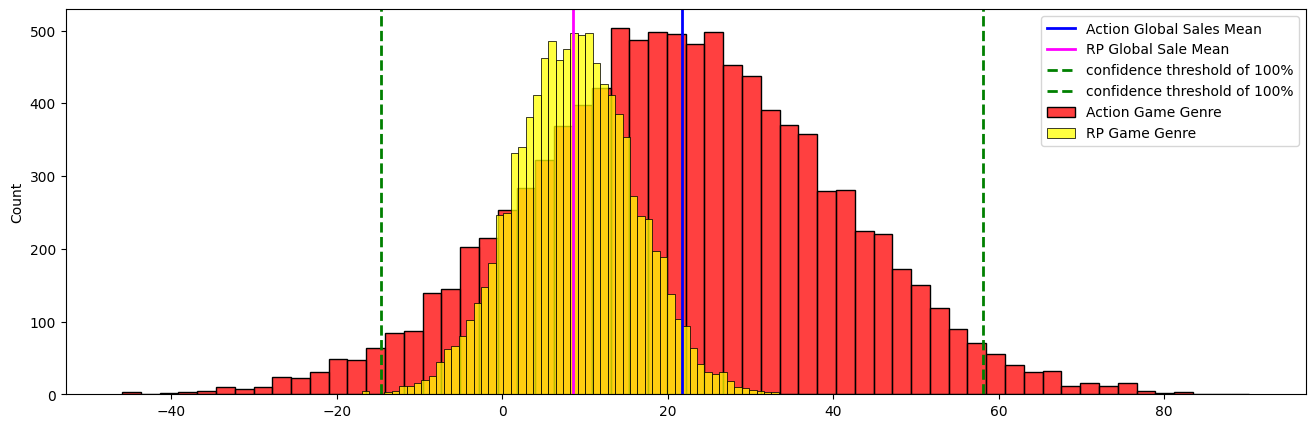

In [141]:
# simulation
actionfig = np.random.normal(Action['Global_Sales'].mean(),Action['Global_Sales'].std(),10000)
sportfig = np.random.normal(RP['Global_Sales'].mean(),RP['Global_Sales'].std(),10000)

# confidence interval based on Action
ci = stats.norm.interval(0.95, Action['Global_Sales'].mean(), Action['Global_Sales'].std())

plt.figure(figsize=(16,5))
sns.histplot(actionfig, label='Action Game Genre',color='red')
sns.histplot(sportfig, label='RP Game Genre',color='yellow')

#mean
plt.axvline(Action['Global_Sales'].mean(), color='blue', linewidth=2, label='Action Global Sales Mean')
plt.axvline(RP['Global_Sales'].mean(), color='magenta',  linewidth=2, label='RP Global Sale Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 100%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 100%')
plt.legend()

From the results of our T - test. We can conclude on the given data that our hypothesis is we reject the H0 which means that the mean of Action is not the same as RP. And given the information from the two genres, it's really a good idea for our company to make a new genre game Action game, because Action game global sale have more than RP game which is is not same, and of course we rejected H0

# Conclusion

After all that we have obtained from all of the Game Sale analysis data, I conclude that the best and most popular games are the Action genre games, and the console platforms that most people use are Playstation 4.

And as a data analysis, we conclude that our company should make games with the most interested game genres in the future 2017, as action games have number 1 rank for 4 times in 4 years in a row, and also we don't find that there will be an increase in game genres other than action, so that's why we have to determine according to the target market that is most in demand, at the top based on the results of our analysis of a game sales data. and the current game console that is most in demand is PS4 because PS4 is the latest release from the Playstation series which was launched in 2013. Previously PS3, PS2, PS and of course their platforms in each series have a high sales market. so we entrust the Action game platform that we will release to the newest Playstation, namely PS4.